<center><h1 style="background-color: #C6F3CD; border-radius: 10px; color: #FFFFFF; padding: 5px;">
Random Forest</h1><center/>

**Link to the article** : https://medium.com/@soulawalid/random-forest-c3b645b2d8bf?sk=9ec7152e1b931fc9efc1cf3efe2344a0

## Classification

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
iris = load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [3]:
rf = RandomForestClassifier()

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)
print(f"Best Hyperparameters: {grid_search.best_params_}")

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best Hyperparameters: {'bootstrap': True, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}


In [4]:
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


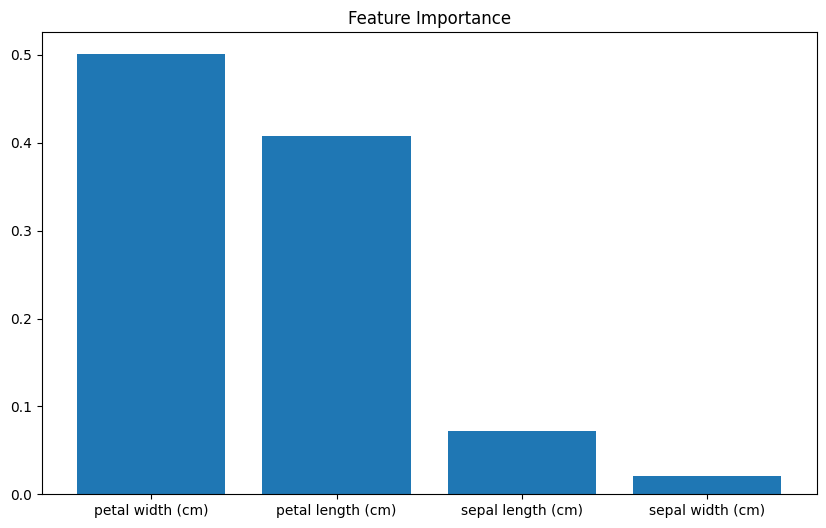

In [5]:
# You can plot features performance if needed
import matplotlib.pyplot as plt

importances = best_rf.feature_importances_
indices = np.argsort(importances)[::-1]
features = iris.feature_names

plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), [features[i] for i in indices])
plt.show()

---

## Regression

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")

In [7]:
X, y = make_regression(n_samples=200, n_features=1, noise=0.1, random_state=42)

data = pd.DataFrame(X, columns=['Feature'])
data['Target'] = y

data

,Feature,Target
0,1.852278,162.386813
1,0.473592,41.638979
2,-1.230864,-107.835717
3,0.625667,54.923916
4,-0.072010,-6.330815
...,...,...
195,0.232254,20.475664
196,-1.328186,-116.426665
197,1.538037,135.034161
198,-0.392108,-34.465484


In [8]:
X_train, X_test, y_train, y_test = train_test_split(data[['Feature']], data['Target'], test_size=0.3, random_state=42)

In [9]:
rf = RandomForestRegressor()

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

print(f"Best Hyperparameters: {grid_search.best_params_}")

best_rf = grid_search.best_estimator_

Fitting 5 folds for each of 162 candidates, totalling 810 fits
Best Hyperparameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


In [10]:
y_pred = best_rf.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

Mean Squared Error: 86.60


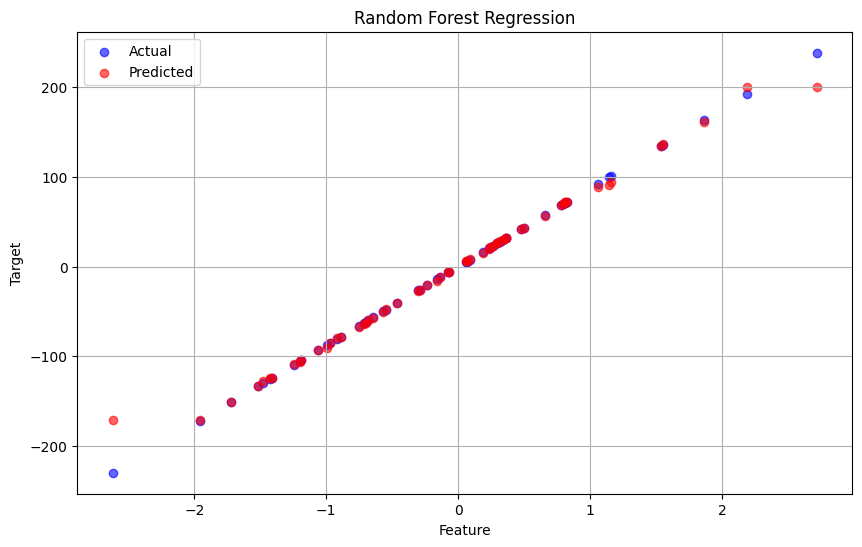

In [11]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual', alpha=0.6)
plt.scatter(X_test, y_pred, color='red', label='Predicted', alpha=0.6)
plt.title('Random Forest Regression')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()
plt.grid()
plt.show()

---

## OOB

In [12]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [13]:
iris = load_iris()
X, y = iris.data, iris.target

## Without

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf_without_oob = RandomForestClassifier(oob_score=False)
rf_without_oob.fit(X_train, y_train)

y_pred_without_oob = rf_without_oob.predict(X_test)

# accuracy_without_oob = accuracy_score(y_test, y_pred_without_oob)
# print(f"Accuracy without OOB scoring: {accuracy_without_oob:.4f}")

### With

In [15]:
rf_with_oob = RandomForestClassifier(oob_score=True)
rf_with_oob.fit(X_train, y_train)

y_pred_with_oob = rf_with_oob.predict(X_test)

accuracy_with_oob = accuracy_score(y_test, y_pred_with_oob)

In [16]:
# Access the OOB score
oob_score = rf_with_oob.oob_score_
print(f"OOB Score: {oob_score:.4f}")

OOB Score: 0.9333
